In [3]:
# Data preparation for Ph.D thesis
# @author: Andres L. Suarez-Cetrulo
%config IPCompleter.greedy=True
# %load_ext jupyternotify
%matplotlib inline

In [4]:
# Imports
import pandas as pd
import numpy as np
import datetime
from pathlib import Path
import os

# Using TALib abstract API to create a dictionary of technical indicators to iterate later.
from talib import abstract

In [5]:
# Creating a dictionary of technical indicators using TALib abstract API
indicator = {'sma': abstract.Function('sma'), 
             'ema': abstract.Function('ema'), 
             'wma': abstract.Function('wma'), 
             'mom': abstract.Function('mom'), 
             'stoch': abstract.Function('stoch'), 
             'macd': abstract.Function('macd'), 
             'rsi': abstract.Function('rsi'), 
             'willr': abstract.Function('willr'), 
             'adosc': abstract.Function('adosc'), 
             'cci': abstract.Function('cci'), 
             'adx': abstract.Function('adx'), 
             'aroon': abstract.Function('aroon'), 
             'bbands': abstract.Function('bbands'), 
             'obv': abstract.Function('obv'), 
             'trima': abstract.Function('trima'), 
             'roc': abstract.Function('roc'), 
             'rocr': abstract.Function('rocr'), 
             'stochf': abstract.Function('stochf'), 
             'medprice': abstract.Function('medprice'), 
             'typprice': abstract.Function('typprice'), 
             'wclprice': abstract.Function('wclprice'), 
             'atr': abstract.Function('atr'), 
             'macdfix': abstract.Function('macdfix'), 
             'mfi': abstract.Function('mfi'), 
             'sar': abstract.Function('sar'), 
             'ppo': abstract.Function('ppo')}
# Add as many indicators as necessary: see all indicators in https://mrjbq7.github.io/ta-lib/

In [6]:
# Paths
# Paths for symbols (not eft)
DATA_PATH=os.sep.join(['C:','Users','suare','PycharmProjects','RegimeSwitchingSeriesGenerator','output'])
# '/Users/asuarez/Downloads'
SOURCE_PATH=DATA_PATH # +'raw\\alpha_vantage\\S&P500\\symbols\\AAPL\\'  # 'raw/alpha_vantage/'
RESULT_PATH=DATA_PATH # +'analysis\\'+SYMBOL.lower()+'\\'

# List of dates for files to be loaded
filename = 'timeseries_created_1571527428'
file = os.sep.join([SOURCE_PATH, filename+'.csv'])
RESULT_FILEPATH_PROCESSED = os.sep.join([RESULT_PATH, filename+'_indicators.csv'])

In [7]:
# Open file
df=pd.read_csv(file)
df['close'] = df['ts']
df.close.head()

0    227.472006
1    227.424023
2    227.376050
3    227.328087
4    227.315381
Name: close, dtype: float64

In [8]:
#Add parameters to transform in TS
timeseries=['close']
#Length of the TS. How many values do we keep per serie. 
# e.g. 1 -> t / 2 -> t,t-1 / 3 -> t,t-1,t-2 / 4 -> t,t-1,t-2,t-3
length = 5

# Add lagged times
for column in timeseries:
    #df[column+'_t']=df[column]
    for i in range(1,length):
        df[column+'_t-'+str(i)]=df[column].shift(i) #it could also be sorted and group by if needed
    #del drops the delected df column
    #del df[column]

In [9]:
# all the numbers here and below assume a default time period for ta params of 10 mins averages
# change the other numbers (params of 5min and 20min and theremoval of 20 first mins of the day below) if the mins number is changed.
# in that case change as well the time tag '_10' with the corresponding one.
default_timerange=10
# Set extra timeranges for moving averages
extra_timeranges=[default_timerange/2, default_timerange, default_timerange*2, default_timerange*3]

# ###########################################
# Iterate and run list of indicators selected
# All of them produced for 25 prior mins of data 
# ###########################################
for key in list(indicator.keys()):
    if key not in ['stoch', 'macd', 'willr', 'adosc', 'cci', 'adx', 
                   'aroon', 'bbands', 'obv', 'stochf', 'medprice',
                   'typprice', 'wclprice', 'atr', 'macdfix', 'mfi',
                   'sar']:  # avoiding indicators that need more than 1 series (more than close: ex: high/low)
        # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
        if key in ['ema','sma','wma','trima']: # ,'macdfix']:
            for timerange in extra_timeranges:
                df[key+'_'+str(timerange)]=indicator[key](df, timeperiod=timerange) 
        elif key not in ['bbands','aroon','stoch','macd','macdfix','stochf']:
            df[key+'_'+str(default_timerange)]=indicator[key](df, timeperiod=(default_timerange))
        # Otherwise check the list of columns and return all
        else: 
            key_output=indicator[key](df, timeperiod=(default_timerange)) #, price='close')
            for j in range(0,len(list(key_output.columns))):
                df[key+'_'+key_output.columns[j]]=key_output[[j]]

df.head()

,n_row,new_switch,cur_switch,current_model_id,new_model_id,weights,ts,ret_ts,ts_n1_pre,ts_n2_pre,...,wma_30,mom_10,rsi_10,trima_5.0,trima_10,trima_20,trima_30,roc_10,rocr_10,ppo_10
0,0,NONE,NONE,1,-1,"(1, 0)",227.472006,0.000211,227.472157,241.349694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NONE,NONE,1,-1,"(1, 0)",227.424023,0.000211,227.423321,172.481403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NONE,NONE,1,-1,"(1, 0)",227.376050,0.000211,227.376139,235.518036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NONE,NONE,1,-1,"(1, 0)",227.328087,0.000211,227.329150,345.676529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NONE,NONE,1,-1,"(1, 0)",227.315381,0.000056,227.316263,263.796395,...,NaN,NaN,NaN,227.379973,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def set_label(row):
    if row['close_t+1'] > row['close']: return 1
    else: return 0

# One minute ahead closing price
df['close_t+1']=df['close'].shift(-1)

# Creating label/y to be predicted / independent (predicted) feature 'y' 
df['label'] = df.apply(set_label, axis=1)
df.drop(columns=['n_row', 'new_switch', 'cur_switch', 'current_model_id', 'new_model_id', 
                 'weights', 'ts', 'ret_ts', 'ts_n1_pre', 'ts_n2_pre', 'ts_n1_post', 'ts_n2_post'], inplace=True)
df.dropna(inplace=True)
df.head()

,close,close_t-1,close_t-2,close_t-3,close_t-4,sma_5.0,sma_10,sma_20,sma_30,ema_5.0,...,rsi_10,trima_5.0,trima_10,trima_20,trima_30,roc_10,rocr_10,ppo_10,close_t+1,label
29,226.904783,226.922800,226.937841,226.952098,226.969010,226.937306,226.978383,227.060543,227.148536,226.937756,...,0.0,226.937457,226.978378,227.060474,227.143790,-0.072944,0.999271,-0.050559,226.886358,0
30,226.886358,226.904783,226.922800,226.937841,226.952098,226.920776,226.961815,227.043960,227.129015,226.920623,...,0.0,226.921345,226.961931,227.044030,227.126619,-0.072969,0.999270,-0.050622,226.870756,0
31,226.870756,226.886358,226.904783,226.922800,226.937841,226.904508,226.945492,227.027527,227.110572,226.904001,...,0.0,226.904585,226.945540,227.027610,227.109828,-0.071895,0.999281,-0.050673,226.856697,0
32,226.856697,226.870756,226.886358,226.904783,226.922800,226.888279,226.929274,227.011271,227.093261,226.888233,...,0.0,226.887739,226.929174,227.011220,227.093305,-0.071438,0.999286,-0.050633,226.840432,0
33,226.840432,226.856697,226.870756,226.886358,226.904783,226.871805,226.912855,226.994937,227.077006,226.872299,...,0.0,226.871510,226.912763,226.994819,227.076908,-0.072331,0.999277,-0.050563,226.821734,0


In [11]:
# Select columns for output
columns_selected=['date',
                 'rsi_10' ,'mom_10',
                 'ema_5','ema_10','ema_20','ema_30',
                 'sma_5','sma_10','sma_20','sma_30',
                 'wma_5','wma_10','wma_20','wma_30',
                 'trima_5','trima_10','trima_20','trima_30',
                 'roc_10','rocr_10','adosc_10','ppo_10',
                 'volume','volume_t-1','volume_t-2','volume_t-3','volume_t-4',
                 'close','close_t-1','close_t-2','close_t-3','close_t-4',
                 'high','high_t-1','high_t-2','high_t-3','high_t-4',
                 'open','open_t-1','open_t-2','open_t-3','open_t-4',
                 'low','low_t-1','low_t-2','low_t-3','low_t-4',
                 'label']

# Export processed data
output = pd.DataFrame(df, columns=columns_selected)
output.to_csv(RESULT_FILEPATH_PROCESSED, sep=';', encoding='utf-8', index = False)

# Printing classes distributions
print("Class distribution: ")
label_zero=len(df[df['label'] == 0])
label_one=len(df[df['label'] == 1])
#print(label_zero)
#print(label_one)
print("0 in "+str(float(label_zero)/(label_one+label_zero))+"%")
print("1 in "+str(float(label_one)/(label_one+label_zero))+"%")

%notify -m "Parsing is finished"

Class distribution: 
0 in 1.0%
1 in 0.0%


UsageError: Line magic function `%notify` not found.


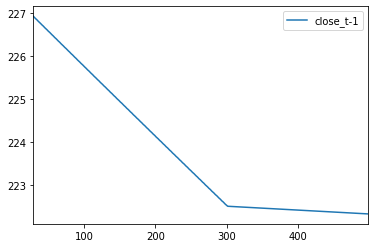

In [12]:
# Now plot close price and volume overtime.
import matplotlib.pyplot as plt
import pandas as pd

df.plot(y=["close_t-1"])
plt.show()